<a href="https://www.kaggle.com/code/rachit47/water-potability-prediction-using-decision-trees?scriptVersionId=102265344" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-probability/water_potability.csv


## **Required Basic Libraries**

In [2]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

##   **Importing The Dataset**

In [3]:
water_df=pd.read_csv('../input/water-probability/water_potability.csv')
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
len(water_df.axes[0])

3276

## **Data Visualisation**

In [5]:
pot= pd.DataFrame(water_df['Potability'].value_counts())
fig = px.pie(pot,values='Potability',names=['Not Potable','Potable'],opacity=0.6,
             labels={'label':'Potability','Potability':'No. Of Samples'},
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(
    font_family='monospace',
    title=dict(text='Samples Of Potable & Non-Potable Water',x=0.47,y=0.98,
               font=dict(color='royalblue',size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='black'))
fig.show()

In [6]:
fig = px.histogram(water_df,x='ph',y=Counter(water_df['ph']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,
                  barmode='group',histfunc='count',
                   width=1000, height=700)
fig.update_layout(
    font_family='Gravitas One',
    title=dict(text='pH Level Distribution Plot',x=0.5,y=0.95,
               font=dict(color='darkblue',size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.98,borderwidth=0,tracegroupgap=5),
    bargap=0.4,
)
fig.show()

In [7]:
fig = px.histogram(water_df,x='Sulfate',y=Counter(water_df['Sulfate']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#51C4D3','#4F7942'],
                  barmode='group',histfunc='count',
                  width=1000, height=700)
fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution Of Sulphates Plot',x=0.53,y=0.95,
               font=dict(color='#17869E',size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [8]:
fig = px.histogram(water_df,x='Organic_carbon',y=Counter(water_df['Organic_carbon']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#17869E','#74C365'],
                  barmode='group',histfunc='count')
fig.update_layout(
    font_family='monospace',
    title=dict(text='Organic Carbon Distribution Plot',x=0.5,y=0.95,
               font=dict(color='#636363',size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='#636363',borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

In [9]:
fig = px.histogram(water_df,x='Hardness',y=Counter(water_df['Hardness']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=['#17869E','#74C365'],
                  barmode='group',histfunc='count',
                  )
fig.add_annotation(text='<76 mg/L is<br> considered soft',x=40,y=130,showarrow=False,font_size=12)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=12)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=12)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=12)
fig.update_layout(
    font_family='monospace',
    title=dict(text='Distribution of Hardness Plot',x=0.55,y=0.98,
               font=dict(color='#636363',size=24)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor='royalblue',borderwidth=0,tracegroupgap=5),
    bargap=0.3
)
fig.show()

In [10]:
cor=water_df.drop('Potability',axis=1).corr()
cor
#We observe that there is very less correlation between all the features

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000


In [11]:
fig = px.imshow(cor,height=1000,width=1000,template='plotly_white',text_auto=True)

fig.update_layout(font_family='monospace',
                title=dict(text='Correlation Heatmap',x=0.6,y=0.96,
                             font=dict(color='#636363',size=28)),
                coloraxis_colorbar=dict(len=0.85,x=1.1) 
                 )

fig.show()


## **Training, Validation & Testing Data-set**

In [12]:
from sklearn.model_selection import train_test_split
train_val_df , test_df = train_test_split(water_df , test_size=0.2 , random_state=42)
train_df , val_df = train_test_split(train_val_df , test_size=0.25 , random_state=42)


## **Identifying Input & Target columns**

In [13]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'Potability'

train_inputs=train_df[input_cols].copy()
train_target=train_df[target_col].copy()

val_inputs=val_df[input_cols].copy()
val_target=val_df[target_col].copy()

test_inputs=test_df[input_cols].copy()
test_target=test_df[target_col].copy()

## **Identifying numerical & categorical columns**

In [14]:
numeric_cols=val_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols=val_inputs.select_dtypes(exclude=np.number).columns.tolist()
print('Numerical Columns : {}'.format(numeric_cols))
print('Categorical Columns : {}'.format(categorical_cols))

Numerical Columns : ['Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
Categorical Columns : []


***In this dataset we don't have any categorical column***

## **Imputing Missing Values**

In [15]:
water_df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [16]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(water_df[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=imputer.transform(test_inputs[numeric_cols])
train_inputs[numeric_cols].isnull().sum()

Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

***Now we have all non-null values in our data-set***

## **Feature Scaling using MinMaxScalar**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler().fit(water_df[numeric_cols])
train_inputs[numeric_cols]=scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols]=scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols]=scaler.transform(test_inputs[numeric_cols])

## **Applying Decision Tree Classifier**

In [18]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42).fit( train_inputs , train_target )

from sklearn.metrics import accuracy_score , confusion_matrix
train_preds = model.predict(train_inputs)
val_preds = model.predict(val_inputs)
test_preds=model.predict(test_inputs)
                         
print('Training set accuracy : {}'.format(accuracy_score(train_target,train_preds)))
print('Validation set accuracy : {}'.format(accuracy_score(val_target,val_preds)))
print('Testing set accuracy : {}'.format(accuracy_score(test_target,test_preds)))

Training set accuracy : 1.0
Validation set accuracy : 0.583206106870229
Testing set accuracy : 0.5945121951219512


## Feature - Importances

In [19]:
importances_df = pd.DataFrame(
    {
        'Feature' : train_inputs.columns,
        'Importance' : model.feature_importances_
    }
).sort_values('Importance',ascending=False)
importances_df
import plotly.express as px
fig = px.bar(importances_df, x='Feature' , y='Importance' , title = 'Feature Importance')
fig.show()

## **Hyper-parameter tunning through Cost Complexity Pruning**

In [20]:
classifier=DecisionTreeClassifier(random_state=0)
path=classifier.cost_complexity_pruning_path(train_inputs , train_target)
ccp_alphas , impurities = path.ccp_alphas , path.impurities     #ccp_aplhas >>> list of weak points of various nodes

In [21]:
classifiers = [ ]
for ccp_alpha in ccp_alphas:
  classifier=DecisionTreeClassifier(random_state=0 , ccp_alpha=ccp_alpha).fit(train_inputs , train_target)
  classifiers.append(classifier)
print ( 'Number of nodes in the last tree is {} with ccp_alpha value : {} ' . format( classifiers[-1].tree_.node_count , ccp_alphas[-1] ) )

Number of nodes in the last tree is 1 with ccp_alpha value : 0.007846993218625753 


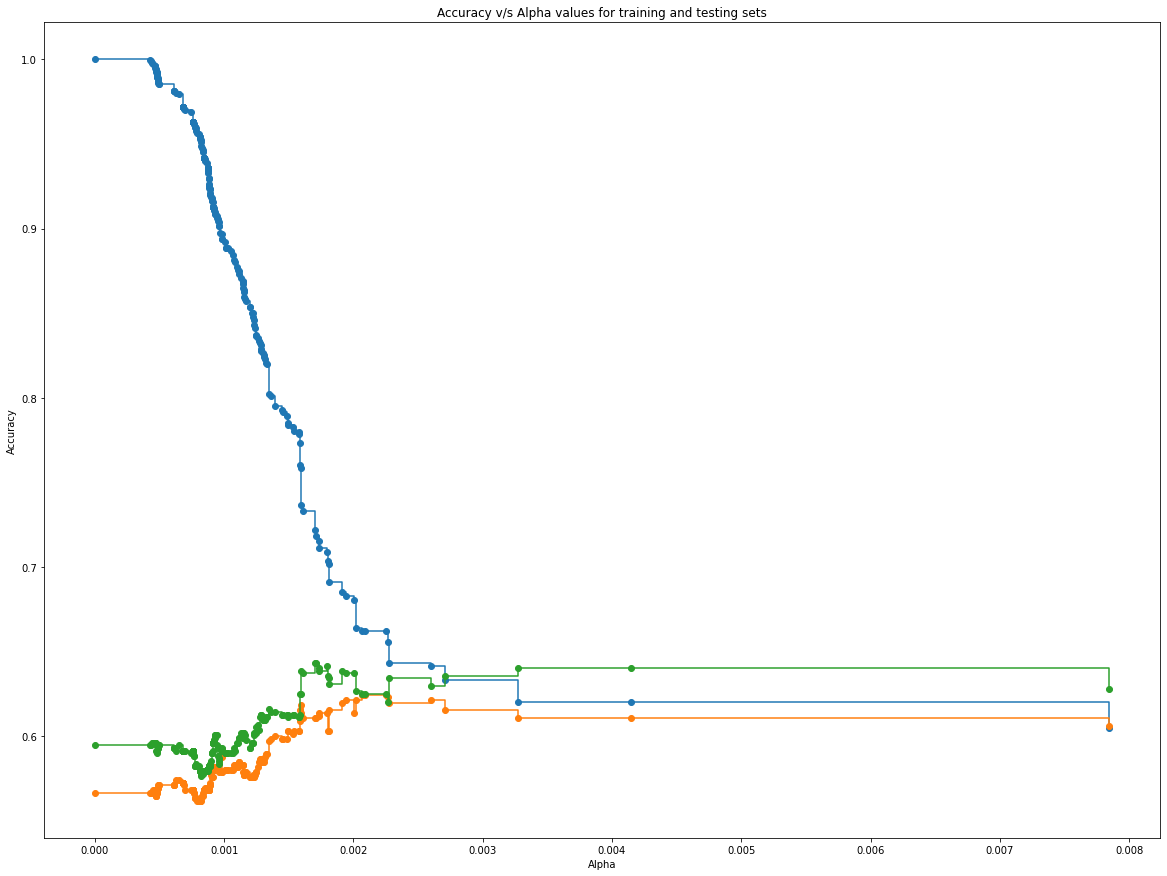

In [22]:
#Accuracy v/s Alpha values for training , validation and testing sets
training_scores = [classifier.score(train_inputs , train_target) for classifier in classifiers] 
validation_scores = [classifier.score(val_inputs , val_target) for classifier in classifiers] 
testing_scores = [classifier.score(test_inputs , test_target) for classifier in classifiers]
fig , ax = plt.subplots()
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
fig.set_figheight(15)
fig.set_figwidth(20)
ax.set_title('Accuracy v/s Alpha values for training and testing sets')
ax.plot(ccp_alphas , training_scores , marker = 'o' , drawstyle='steps-post' , label = 'train')
ax.plot(ccp_alphas , validation_scores , marker = 'o' , drawstyle='steps-post' , label = 'train')
ax.plot(ccp_alphas , testing_scores , marker ='o' , drawstyle='steps-post' , label = 'train')
plt.show()

Training Set Accuracy : 64.3257%
Validation Set Accuracy : 61.9847%
Testing Set Accuracy : 63.4146%


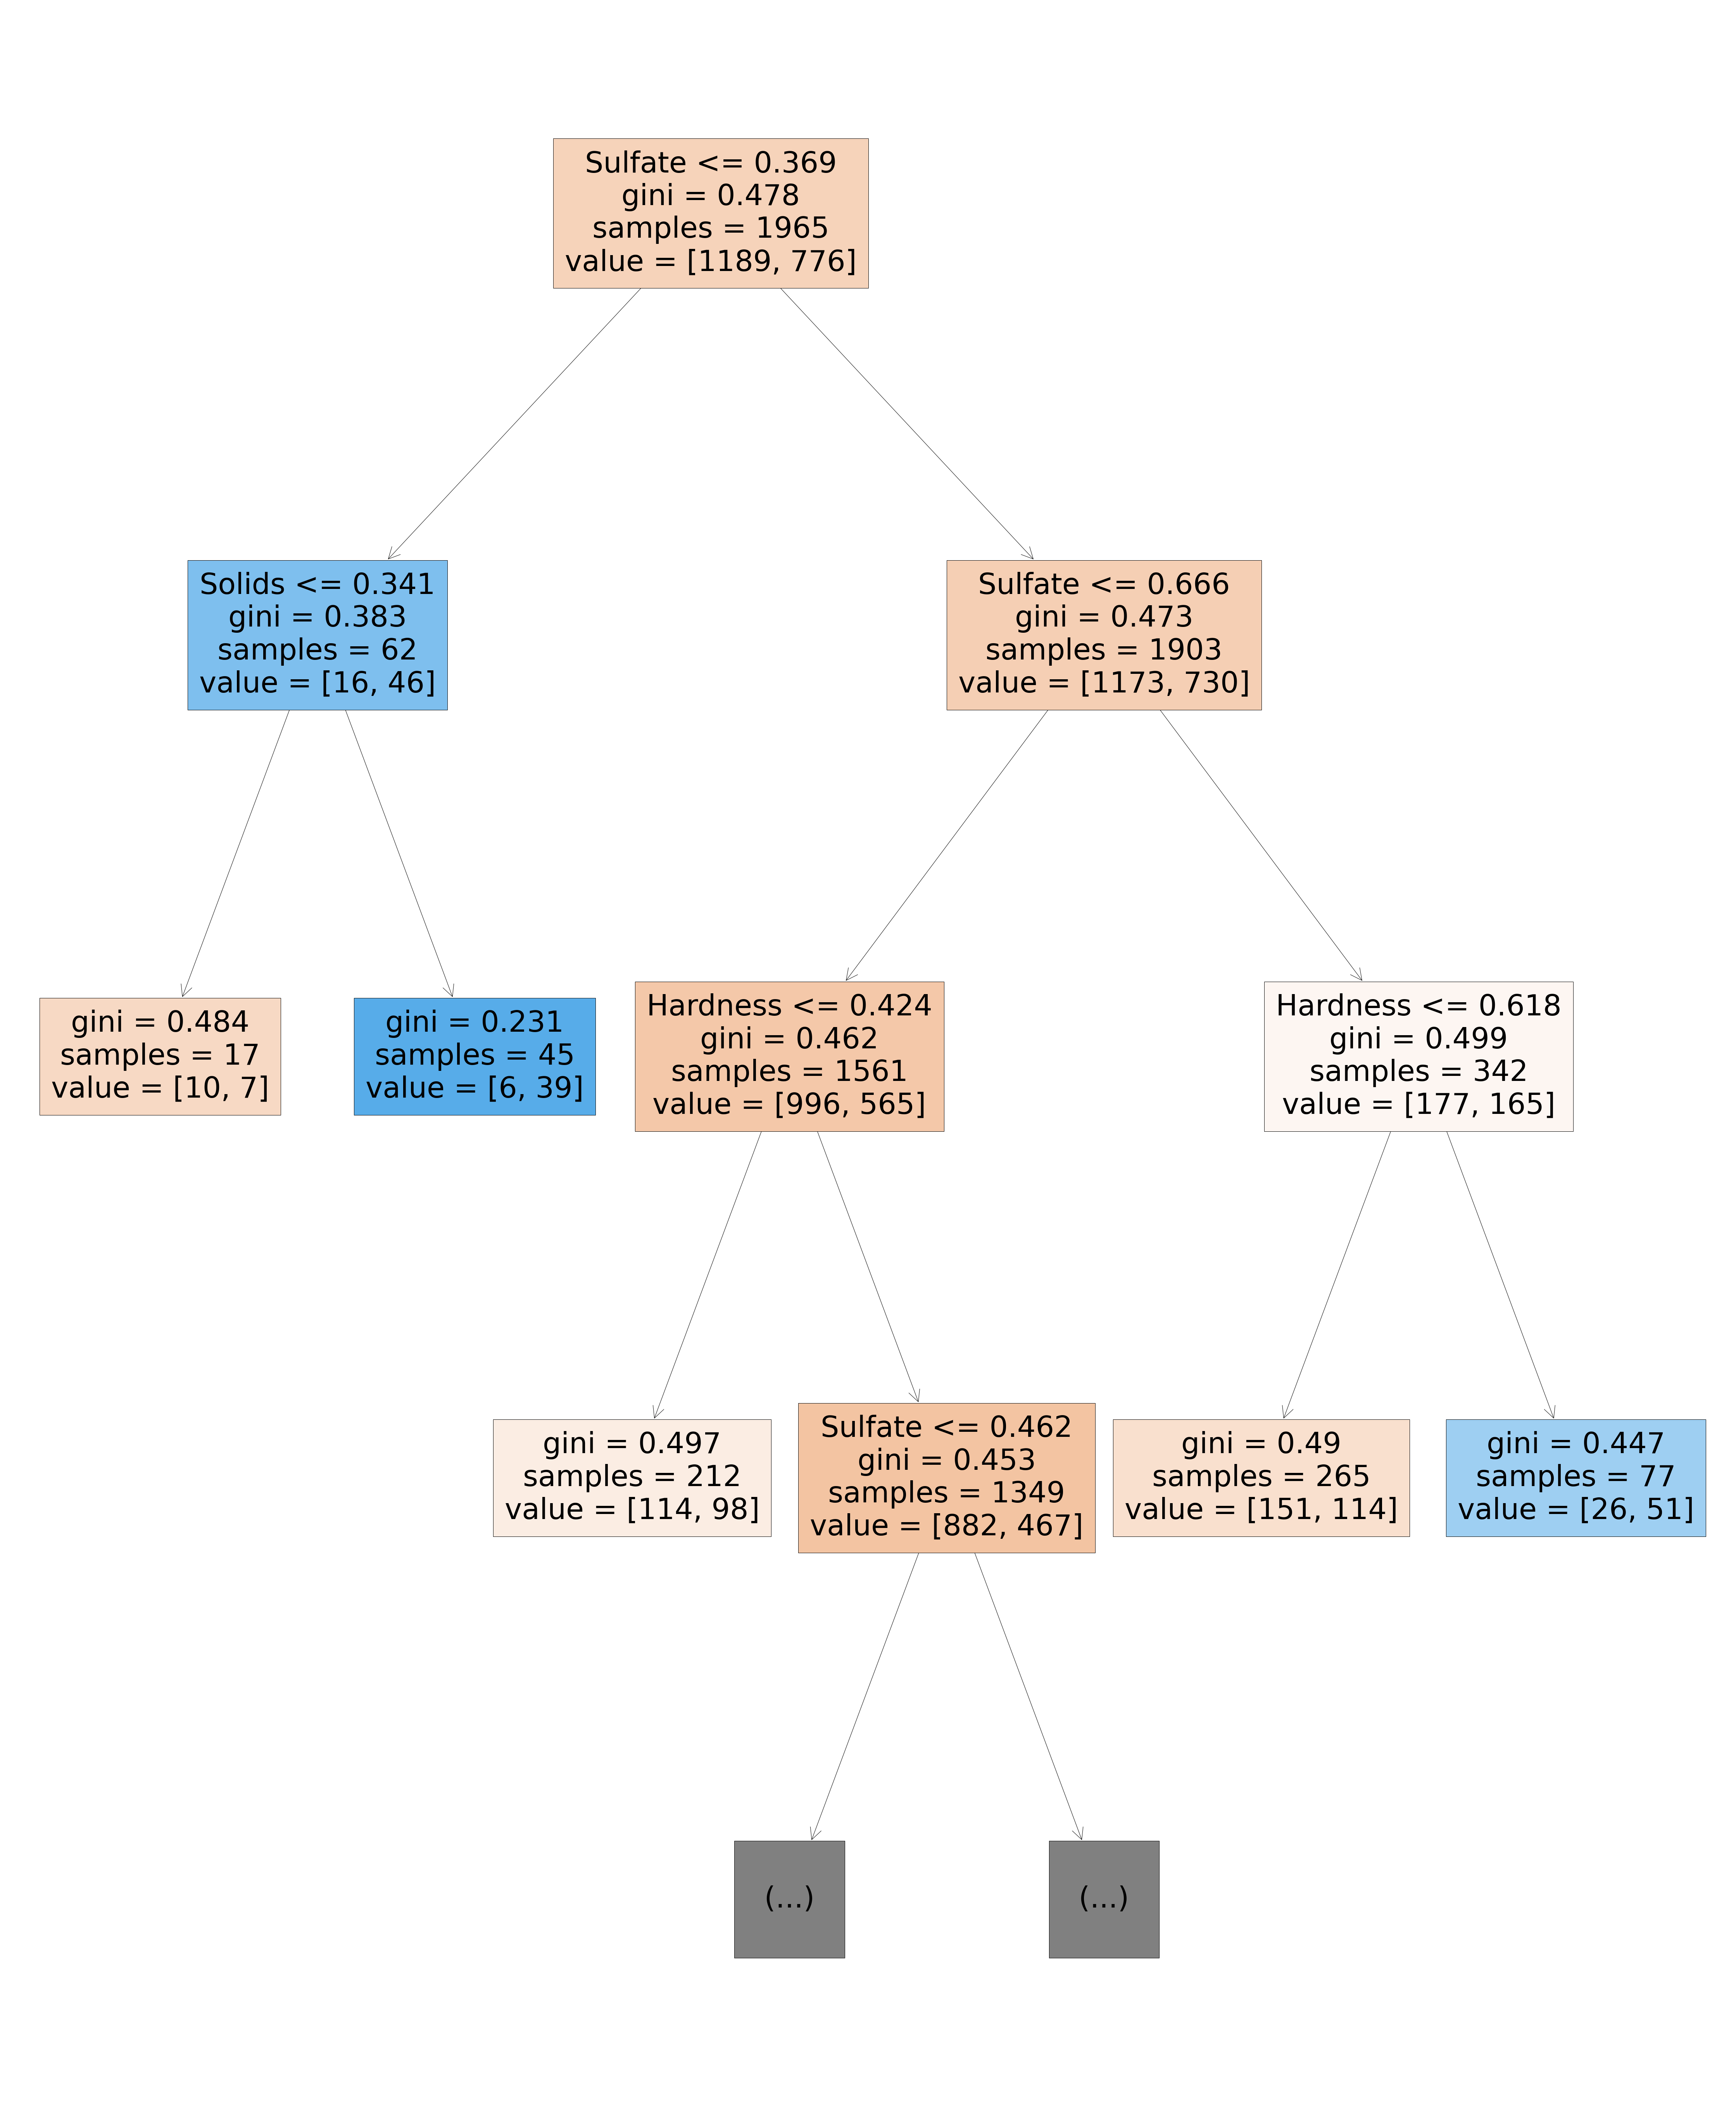

In [23]:
model = DecisionTreeClassifier(random_state=0,ccp_alpha = 0.0025).fit(train_inputs , train_target)
train_pred = model.predict(train_inputs)
val_pred = model.predict(val_inputs)
test_pred = model.predict(test_inputs)
print('Training Set Accuracy : {:.4f}%'.format(accuracy_score(train_target , train_pred)*100))
print('Validation Set Accuracy : {:.4f}%'.format(accuracy_score(val_target , val_pred)*100))
print('Testing Set Accuracy : {:.4f}%'.format(accuracy_score(test_target , test_pred)*100))

from sklearn.tree import plot_tree,export_text
plt.figure(figsize = (80,100))
plot_tree(model , feature_names = train_inputs.columns , max_depth=3 , filled=True);

In [24]:
#Display the tree as text
tree_text=export_text(model , feature_names=list(train_inputs.columns) , max_depth=5)
print(tree_text[:5000])

|--- Sulfate <= 0.37
|   |--- Solids <= 0.34
|   |   |--- class: 0
|   |--- Solids >  0.34
|   |   |--- class: 1
|--- Sulfate >  0.37
|   |--- Sulfate <= 0.67
|   |   |--- Hardness <= 0.42
|   |   |   |--- class: 0
|   |   |--- Hardness >  0.42
|   |   |   |--- Sulfate <= 0.46
|   |   |   |   |--- Hardness <= 0.55
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Hardness >  0.55
|   |   |   |   |   |--- class: 0
|   |   |   |--- Sulfate >  0.46
|   |   |   |   |--- class: 0
|   |--- Sulfate >  0.67
|   |   |--- Hardness <= 0.62
|   |   |   |--- class: 0
|   |   |--- Hardness >  0.62
|   |   |   |--- class: 1

